<a href="https://colab.research.google.com/github/Aurora-st/Prodigy_ML_4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:29<00:00, 93.0MB/s]
100% 2.13G/2.13G [00:29<00:00, 76.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/leapgestrecog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

# Define the path to the extracted dataset
dataset_path = '/content/leapgestrecog'

# List all files and directories in the dataset path
files_and_dirs = os.listdir(dataset_path)
print(files_and_dirs)  # This should print out the contents of the dataset directory


['leapGestRecog']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the extracted dataset
dataset_path = '/content/leapgestrecog'

# Image data generators for augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images to the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set aside 20% of data for validation
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Use only the training subset
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='validation'  # Use only the validation subset
)


Found 16000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for gesture classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # You can adjust this based on performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 168s 332ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
500/500 [==============================] - 167s 335ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
500/500 [==============================] - 167s 335ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 165s 329ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 167s 333ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 170s 339ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 167s 334ms/step - loss: 0.0000e+0

125/125 [==============================] - 20s 162ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.00


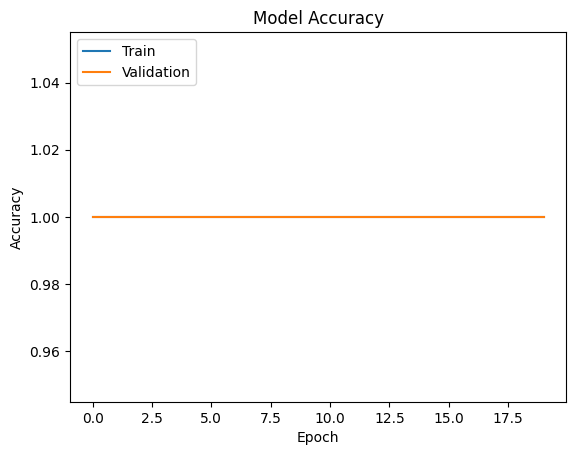

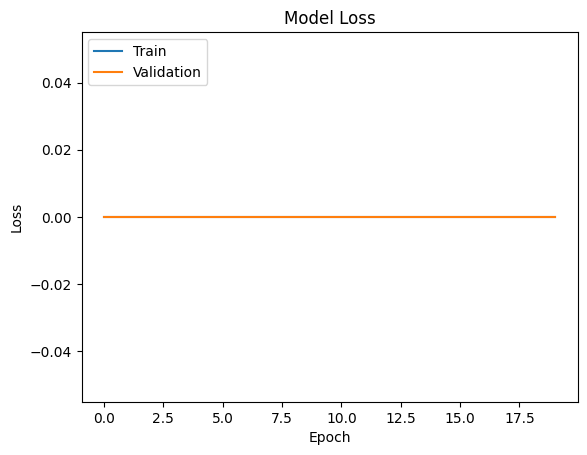

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the model
model.save('/content/gesture_recognition_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/gesture_recognition_model.h5')
import cv2
import numpy as np

# Load the trained model
model = load_model('/content/gesture_recognition_model.h5')

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    img = cv2.resize(frame, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    predictions = model.predict(img)
    gesture_index = np.argmax(predictions)
    gesture_label = list(train_generator.class_indices.keys())[gesture_index]

    # Display the gesture label
    cv2.putText(frame, f'Gesture: {gesture_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load the EfficientNetB0 model with pre-trained weights, excluding the top fully connected layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom layers on top of EfficientNetB0
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use Global Average Pooling
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for gesture classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # You can adjust this based on performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)



Epoch 1/20
500/500 [==============================] - 541s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
500/500 [==============================] - 490s 980ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
500/500 [==============================] - 493s 985ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 496s 992ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 495s 988ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 495s 990ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 501s 1s/step - loss: 0.00

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


125/125 [==============================] - 34s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Loss: 0.0
Validation Accuracy: 1.0
